# MNIST For ML Beginners

Please see full documentation at:

https://www.tensorflow.org/versions/r1.1/get_started/mnist/beginners

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

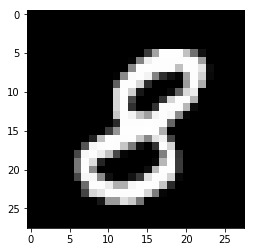

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
batch = mnist.train.next_batch(1)
plotData = batch[0]
print(plotData)
plotData = plotData.reshape(28, 28)
plt.gray() # use this line if you don't want to see it in color
plt.imshow(plotData)
plt.show()

In [10]:
x = tf.placeholder(tf.float32, [None, 784])

In [11]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [12]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [13]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [14]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [15]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [16]:
sess = tf.InteractiveSession()

In [17]:
tf.global_variables_initializer().run()

In [18]:
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [19]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [20]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [21]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9191
